In [1]:
from pyargus.directionEstimation import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
import pandas as pd
data = pd.read_json(r"C:\Users\pedro\OneDrive\Documentos\Eletrica\Eletrica\TCC - Macapá\TCC-AoA\teste do final 4-10\data.json")
data

,index,mac,timestamp,no,rssi,raw,Angle,Distance,frequency,iq
0,0,c300000a7a63,2024-10-04 15:45:53.217000+00:00,0,-52,0201061bff3906cafb0114fff9ffe200fd000000000000...,90,200,2426,"[97, -130, 107, 121, -138, 80, -51, -154, 165,..."
1,1,c300000a7a63,2024-10-04 15:45:53.740000+00:00,0,-55,0201061bff3906cafb0114f9ffe2fffd00000000000000...,90,200,2480,"[-155, -73, 94, -150, 115, 121, -139, 98, -52,..."
2,2,c300000a7a63,2024-10-04 15:45:54.273000+00:00,0,-58,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2480,"[-83, -157, 169, -58, 14, 170, -177, -24, 51, ..."
3,3,c300000a7a63,2024-10-04 15:45:54.786000+00:00,0,-53,0201061bff3906cafb0114f9ffe7ff0001000000000000...,90,200,2402,"[-147, -58, 92, -131, 101, 121, -143, 71, -48,..."
4,4,c300000a7a63,2024-10-04 15:45:55.320000+00:00,0,-53,0201061bff3906cafb0114f9ffe4ff0001000000000000...,90,200,2402,"[-88, -144, 141, -55, 4, 155, -159, -19, 36, -..."
...,...,...,...,...,...,...,...,...,...,...
8609,228,c300000a7a48,2024-10-04 17:05:24.358000+00:00,0,-56,0201061bff3906cafb01140000ecff0001000000000000...,0,100,2402,"[-47, 171, -145, -56, 99, -123, 115, 139, -143..."
8610,229,c300000a7a48,2024-10-04 17:05:24.882000+00:00,0,-56,0201061bff3906cafb0114feffecfffd00000000000000...,0,100,2402,"[148, 65, -99, 127, -114, -122, 139, -90, 67, ..."
8611,230,c300000a7a48,2024-10-04 17:05:25.667000+00:00,0,-56,0201061bff3906cafb01140000ffe90102000000000000...,0,100,2426,"[-142, -72, 101, -125, 115, 114, -127, 90, -59..."
8612,231,c300000a7a48,2024-10-04 17:05:25.928000+00:00,0,-57,0201061bff3906cafb01140000e9ff0201000000000000...,0,100,2426,"[-157, -15, 40, -160, 153, 55, -74, 145, -120,..."


In [127]:
sample =data.iloc[np.random.randint(len(data))]
iq_samples = sample["iq"][16:]
iq_samples

[-97,
 -111,
 -64,
 140,
 -9,
 74,
 -28,
 146,
 146,
 -35,
 67,
 -43,
 133,
 -74,
 -95,
 -110,
 -73,
 -36,
 -124,
 -74,
 -38,
 142,
 18,
 76,
 19,
 147,
 138,
 -64,
 54,
 -50,
 93,
 -115,
 -127,
 -77,
 -80,
 -16,
 -143,
 -46,
 0,
 150,
 31,
 72,
 51,
 140,
 121,
 -88,
 42,
 -67,
 77,
 -126,
 -137,
 -48,
 -79,
 -7,
 -146,
 4,
 34,
 144,
 43,
 59,
 82,
 125,
 96,
 -115,
 25,
 -73,
 65,
 -140]

In [128]:
iq_samplesc = [complex(iq_samples[i],iq_samples[i+1]) for i in range(0,len(iq_samples),2)]
iq_samplesc

[(-97-111j),
 (-64+140j),
 (-9+74j),
 (-28+146j),
 (146-35j),
 (67-43j),
 (133-74j),
 (-95-110j),
 (-73-36j),
 (-124-74j),
 (-38+142j),
 (18+76j),
 (19+147j),
 (138-64j),
 (54-50j),
 (93-115j),
 (-127-77j),
 (-80-16j),
 (-143-46j),
 150j,
 (31+72j),
 (51+140j),
 (121-88j),
 (42-67j),
 (77-126j),
 (-137-48j),
 (-79-7j),
 (-146+4j),
 (34+144j),
 (43+59j),
 (82+125j),
 (96-115j),
 (25-73j),
 (65-140j)]

In [129]:
matrix = [iq_samplesc[i:i+3] for i in range(0,len(iq_samplesc)-3,3)]
matrix = np.array(matrix)
matrix

array([[ -97.-111.j,  -64.+140.j,   -9. +74.j],
       [ -28.+146.j,  146. -35.j,   67. -43.j],
       [ 133. -74.j,  -95.-110.j,  -73. -36.j],
       [-124. -74.j,  -38.+142.j,   18. +76.j],
       [  19.+147.j,  138. -64.j,   54. -50.j],
       [  93.-115.j, -127. -77.j,  -80. -16.j],
       [-143. -46.j,    0.+150.j,   31. +72.j],
       [  51.+140.j,  121. -88.j,   42. -67.j],
       [  77.-126.j, -137. -48.j,  -79.  -7.j],
       [-146.  +4.j,   34.+144.j,   43. +59.j],
       [  82.+125.j,   96.-115.j,   25. -73.j]])

In [130]:
d = 50/125 # Inter element spacing [lambda]
M = 3  # number of antenna elements in the antenna system (ULA)
N = 2**12  # sample size used for the simulation          
theta = 60 # incident angle of the test signal [deg]
    
# Array response vectors of the test signal
a = np.exp(np.arange(0,M,1)*1j*2*np.pi*d*np.cos(np.deg2rad(theta)))

In [131]:
a_90 = np.exp(np.arange(0,M,1)*1j*2*np.pi*d*np.cos(np.deg2rad(90)))
a_0 = np.exp(np.arange(0,M,1)*1j*2*np.pi*d*np.cos(np.deg2rad(0)))
a_60 = np.exp(np.arange(0,M,1)*1j*2*np.pi*d*np.cos(np.deg2rad(60)))

# To display only the first fractional digit
np.set_printoptions(precision=1) 

print("Signal is received from the front: a=",a_90)
print("Signal is received from the side: a=",a_0)
print("Signal is received on 60 deg: a=",a_60)

Signal is received from the front: a= [1.+0.0e+00j 1.+1.5e-16j 1.+3.1e-16j]
Signal is received from the side: a= [ 1. +0.j  -0.8+0.6j  0.3-1.j ]
Signal is received on 60 deg: a= [ 1. +0.j   0.3+1.j  -0.8+0.6j]


In [132]:
# Array response vectors of the test signal
a = np.exp(np.arange(0,M,1)*1j*2*np.pi*d*np.cos(np.deg2rad(theta)))

# Generate multichannel test signal 
soi = np.random.normal(0,1,N)  # Signal of Interest
soi_matrix  = np.outer( soi, a).T 

# Generate multichannel uncorrelated noise
noise = np.random.normal(0,np.sqrt(10**-1),(M,N))

# Create received signal array
rec_signal = soi_matrix + noise 
rec_signal = matrix.T

In [133]:
R = corr_matrix_estimate(rec_signal.T, imp="mem_eff")
R

array([[21994.8    +0.j , -6091.3+21163.1j, -6874.6 +9197.3j],
       [-6091.3-21163.1j, 22223.5    +0.j , 10814.5 +4113.5j],
       [-6874.6 -9197.3j, 10814.5 -4113.5j,  6060.4    +0.j ]])

In [134]:
array_alignment = np.arange(0, M, 1)* d
incident_angles= np.arange(0,181,1)
ula_scanning_vectors = gen_ula_scanning_vectors(array_alignment, incident_angles)

Minimum alias angle 0.00 
Maximum alias angle 0.00 


<Axes: title={'center': 'Direction of Arrival estimation '}, xlabel='Incident angle [deg]', ylabel='Amplitude [dB]'>

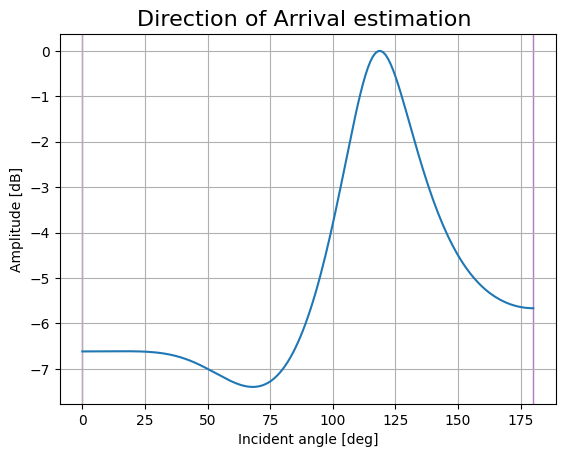

In [135]:
Bartlett = DOA_MUSIC(R,ula_scanning_vectors, signal_dimension = 1)
DOA_plot(Bartlett, incident_angles, log_scale_min = -50)

In [136]:
sample["Angle"]

120

In [137]:
incident_angles[np.argmax(Bartlett)]

119